![Astrofisica Computacional](../logo.PNG)

---
## 01. Decision Trees

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

Clustering


---

---

## Clusters

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('6class.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


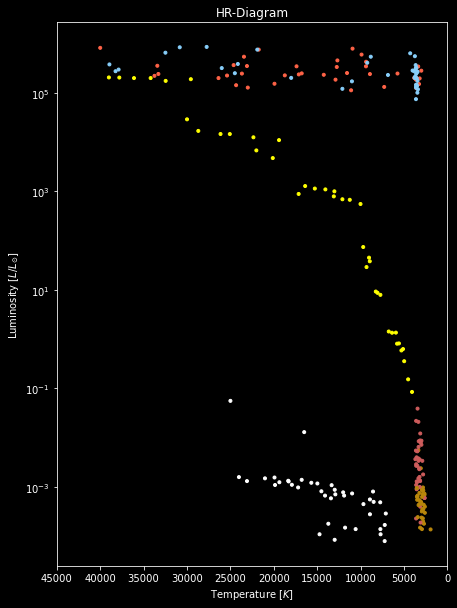

In [32]:
colors = {0:'darkgoldenrod' , 1:'indianred', 2:'white', 3:'yellow', 4:'tomato', 5:'lightskyblue'}


plt.figure(figsize=(7,10))
plt.style.use('dark_background')
plt.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], marker='.', color = [colors[r] for r in df['Star type']])#,c=df['Star type'])
plt.xlim(45000,0)
plt.yscale('log')
plt.title('HR-Diagram')
plt.xlabel(r'Temperature $[K]$')
plt.ylabel(r'Luminosity $[L/L_{\odot}]$')
plt.show()

In [13]:
df['Star color'][0]

'Red'

In [10]:
SDSSgals_df = SDSSgals.to_pandas()
SDSSgals_df.to_csv('SDSSdata.csv', index=False)
SDSSgals_df

,ug,gr,gi,gz,petroRad_i,petroR50_i,deVAB_i
0,1.121708,1.396580,2.130693,2.535936,4.519153,1.872421,0.559964
1,1.792809,1.768518,2.524124,2.907356,4.243830,1.669696,0.914420
2,1.894390,0.923239,1.339203,1.679128,6.378449,2.613452,0.914933
3,1.840790,0.890741,1.288263,1.593090,2.717706,1.217582,0.577346
4,0.514933,0.767977,1.594810,2.005058,3.370125,1.448429,0.803933
...,...,...,...,...,...,...,...
9995,2.083250,2.056517,3.051100,3.441381,2.139250,1.043615,0.776197
9996,2.878315,1.667009,2.632729,3.175478,1.681557,0.774208,0.050000
9997,1.546240,1.491131,2.490173,2.902569,3.617081,1.343076,0.732014
9998,4.397469,1.500385,2.232164,2.391920,3.757993,1.114649,0.209133


In [11]:
Xgal = np.array(SDSSgals_df)
Xgal

array([[1.121708 , 1.39658  , 2.130693 , ..., 4.519153 , 1.872421 ,
        0.5599636],
       [1.792809 , 1.768518 , 2.524124 , ..., 4.24383  , 1.669696 ,
        0.9144205],
       [1.89439  , 0.9232388, 1.339203 , ..., 6.378449 , 2.613452 ,
        0.914933 ],
       ...,
       [1.54624  , 1.491131 , 2.490173 , ..., 3.617081 , 1.343076 ,
        0.7320144],
       [4.397469 , 1.500385 , 2.232164 , ..., 3.757993 , 1.114649 ,
        0.2091329],
       [4.298693 , 1.870249 , 2.486403 , ..., 2.724879 , 1.18641  ,
        0.7998498]])

In [ ]:
from sklearn.cluster import DBSCAN


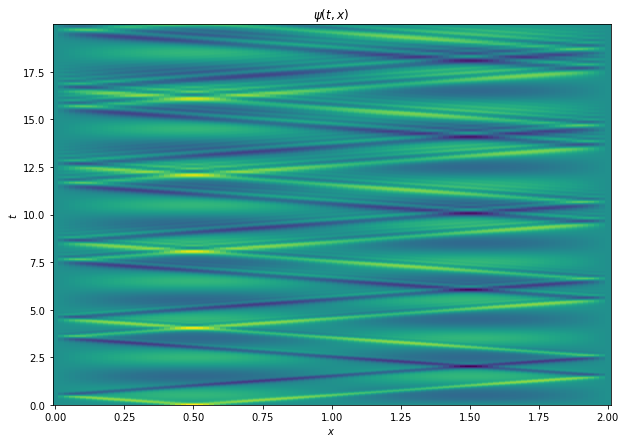

In [6]:
plt.figure(figsize=(10,7))
plt.pcolormesh(xgrid, tgrid, psi,shading='auto')
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.title(r'$\psi (t,x)$')
plt.show()

---
## Método FTCS

El primer método que se describirá para resolver la ecuación de onda es el **FTCS** (**F**orfward **T**ime, **C**entered **S**pace). Para ilustrarlo, consideramos la ecuación de onda unidimensional,

\begin{equation}
\frac{\partial^2 \psi}{\partial t^2} = v^2 \frac{\partial^2 \psi}{\partial x^2}.
\end{equation}

Dividiendo el rango espacial $x\in [0,L]$ en subintervalos de igual tamaño $\Delta x$, la segunda derivada espacial en el lado derecho de la ecuación se discretiza con diferencias finitas centradas,

\begin{equation}
\frac{\partial^2 \psi }{\partial t^2} = \frac{v^2}{\Delta x^2} \left[ \psi (t,x+\Delta x) + \psi (t,x-\Delta x) -2 \psi (t,x)\right].
\end{equation}

Ahora se reescribe la ecuación diferencial como un conjunto de dos ecuaciones de primer orden introduciendo una nueva función $\phi (t,x)$,

\begin{equation}
\begin{cases}
\frac{d\psi}{dt} = & \phi(t,x)\\
\frac{d\phi}{dt}= &\frac{v^2}{\Delta x^2} \left[ \psi (t,x+\Delta x) + \psi (t,x-\Delta x) -2 \psi (t,x)\right].
\end{cases}
\end{equation}

Para resolver esta sistema de ecuaciones se utiliza el método de Euler,

\begin{equation}
\begin{cases}
\psi(t+\Delta t, x) = & \psi(t,x) +  \phi(t,x) \Delta t \\
\phi(t+\Delta t, x) = & \phi(t,x) + \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi (t,x+\Delta x) -2 \psi (t,x) + \psi (t,x-\Delta x) \right],
\end{cases}
\end{equation}

que se puede re-escribir como ecuaciones iterativas,

\begin{equation}
\begin{cases}
\psi^{(n+1)}_j = & \psi^{(n)}_j +  \phi^{(n)}_j \Delta t\\
\phi^{(n+1)}_j = & \phi^{(n)}_j + \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi^{(n)}_{j+1} -2 \psi^{(n)}_j + \psi^{(n)}_{j-1} \right].
\end{cases}
\end{equation}

El método FTCS es **incondicionalmente inestable** para resolver la ecuación de onda.

---
## Método Implícito

El algoritmo FTCS se puede modificar para mejorar su estabilidad.  Para ello, primero sustituimos $\Delta t \rightarrow -\Delta t$,

\begin{equation}
\begin{cases}
\psi(t-\Delta t, x) = & \psi(t,x) -  \phi(t,x) \Delta t \\
\phi(t-\Delta t, x) = & \phi(t,x) - \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi (t,x+\Delta x) -2 \psi (t,x) + \psi (t,x-\Delta x) \right].
\end{cases}
\end{equation}

Este cambio implica que se esta evolucionando el sistema hacia atrás en el tiempo en un paso de tamaño $\Delta t$, pero ahora se realiza la transformación $t \rightarrow t +\Delta t$ para obtener

\begin{equation}
\begin{cases}
\psi(t, x) = & \psi(t + \Delta t,x) -  \phi(t + \Delta t,x) \Delta t \\
\phi(t, x) = & \phi(t + \Delta t,x) - \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi (t+\Delta t,x+\Delta x) -2 \psi (t+\Delta t,x) + \psi (t+\Delta t,x-\Delta x) \right].
\end{cases}
\end{equation}

Estas ecuaciones se pueden re-acomodar en la forma

\begin{equation}
\begin{cases}
\psi(t + \Delta t,x) -  \phi(t + \Delta t,x) \Delta t &= \psi(t, x)  \\
 \phi(t + \Delta t,x) - \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi (t+\Delta t,x+\Delta x) -2 \psi (t+\Delta t,x) + \psi (t+\Delta t,x-\Delta x) \right] &=\phi(t, x) ,
\end{cases}
\end{equation}

o como la ecuación iterativa

\begin{equation}
\begin{cases}
\psi^{(n+1)}_j -  \phi^{(n+1)}_j \Delta t &= \psi^{(n)}_j  \\
 \phi^{(n+1)}_j - \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi^{(n+1)}_{j+1} -2 \psi ^{(n+1)}_{j} + \psi ^{(n+1)}_{j-1} \right] &=\phi^{(n)}_{j}.
\end{cases}
\end{equation}

Claramente este es un **método implícito** que no permite obtener la solución de forma directa. Sin embargo, el conjunto de ecuaciones puede ser escrito como un sistema lineal de ecuaciones simultaneas para $\psi$ y $\phi$ en cada punto de la malla que uede resolverse por métodos estandard como la eliminación Gaussiana. 

Aunque este método implica la solución de un sistema lineal en cada punto y por ello es más lento que el  FTCS, tiene l ventaja de ser **incondicionalmente estable** para resolver la ecuaciónd e onda. 

---

## Método de Crank-Nicolson

El método de Crank-Nicolson es un híbrido entre le método FTCS y el implícito. Las ecuaciones correspondientes se obtienen tomando el promedio de las ecuaciones de estos dos métodos. El resultado es

\begin{equation}
\begin{cases}
\psi(t + \Delta t,x) -  \frac{1}{2} \phi(t + \Delta t,x) \Delta t = \psi(t, x) + \frac{1}{2}\phi(t ,x) \Delta t \\
 \phi(t + \Delta t,x) - \frac{v^2 \Delta t}{2 \Delta x^2} \left[ \psi (t+\Delta t,x+\Delta x) -2 \psi (t+\Delta t,x) + \psi (t+\Delta t,x-\Delta x) \right] =\phi(t, x) + \frac{v^2 \Delta t}{2 \Delta x^2} \left[ \psi (t,x+\Delta x) -2 \psi (t,x) + \psi (t,x-\Delta x) \right],
\end{cases}
\end{equation}

o como relación de recurrencia,

\begin{equation}
\begin{cases}
\psi^{(n+1)}_j - \frac{1}{2} \phi^{(n+1)}_j \Delta t = \psi^{(n)}_j  + \frac{1}{2} \phi^{(n)}_j \Delta t\\
 \phi^{(n+1)}_j - \frac{v^2 \Delta t}{2\Delta x^2} \left[ \psi^{(n+1)}_{j+1} -2 \psi ^{(n+1)}_{j} + \psi ^{(n+1)}_{j-1} \right] =\phi^{(n)}_{j} + \frac{v^2 \Delta t}{2\Delta x^2} \left[ \psi^{(n)}_{j+1} -2 \psi ^{(n)}_{j} + \psi ^{(n)}_{j-1} \right].
\end{cases}
\end{equation}